<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics/blob/master/dz_4_version2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашняя работа №4

Для датасета kaggle, Credit Card Fraud Detection. https://www.kaggle.com/mlg-ulb/creditcardfraud 

In [3]:
import numpy as np

from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns
from sklearn.metrics import classification_report

%matplotlib inline

**1. Загрузить датасет**

In [4]:
creditcard = pd.read_csv('creditcard.csv')
creditcard.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


**2. Посмотреть отсутствующие значения (какое количество Nan элементов).**

In [5]:
creditcard.info()
# нет NaN элементов

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

**3. Основное таргет значение: 1 - сделка была обманной, 0 - честной. Сделать график barplot для этих двух классов из колонки 'Class'. Посчитать количество элементов в классе 1 и в классе 2.**

In [52]:
# Class - определяет какое значение было
# Группировка
# Рассчет количества элементов в классах
df_group = creditcard[['Class', 'V1']].groupby(['Class']).agg(['count'])
df_group = df_group.reset_index()
print(df_group)


  Class      V1
          count
0     0  284315
1     1     492


C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
No handles with labels found to put in legend.


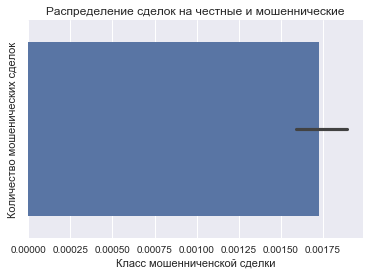

In [53]:
ax = sns.barplot(x="Class", data=creditcard[['Class', 'V1']])
plt.xlabel('Класс мошенниченской сделки')
plt.ylabel('Количество мошенических сделок')
plt.title("Распределение сделок на честные и мошеннические")
plt.legend()
plt.show()
# что-то не очень, покрутим дальше

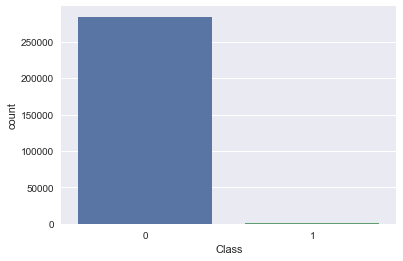

In [54]:
# Более подходящий подвид barplot - countplot. Видно, что доля по количеству мошеннических действий крайне мала
sns.set(style="darkgrid")
ax = sns.countplot(x="Class", data=creditcard)

**4. Сколько денег было использовано в обманных операциях, а сколько - в нормальных операциях?** Сделать частотный график по колонке Amount для колонки Class по двум независимым выборкам: обманная операция, нормальная операция

In [80]:
# Количество денег которые проведены
df_Amount_sum = creditcard[['Class', 'Amount']].groupby(['Class']).agg(['sum'])
df_Amount_sum = df_Amount_sum.reset_index()
print(df_Amount_sum)
type(df_Amount_sum)



  Class        Amount
                  sum
0     0  2.510246e+07
1     1  6.012797e+04


pandas.core.frame.DataFrame

C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


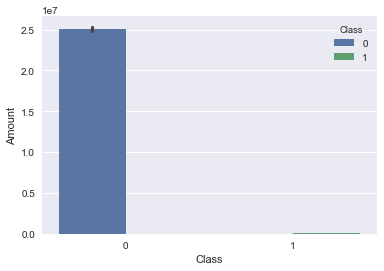

In [81]:
ax = sns.barplot(x="Class", y="Amount", hue="Class", data=creditcard, estimator=sum)
# Объем денег в обманных операциях также не значительный, по сравнению с основыми операциями. 
# (см. на количество знаков e+04 и e+07)

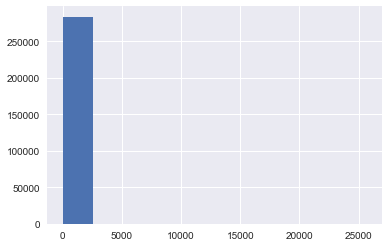

In [89]:
# Сделать частотный график по колонке Amount для колонки 
# Class по двум независимым выборкам: обманная операция, нормальная операция
Amoutn_good = creditcard[creditcard['Class'] == 0]['Amount']
Amoutn_bad = creditcard[creditcard['Class'] == 1]['Amount']
Amoutn_good.hist()

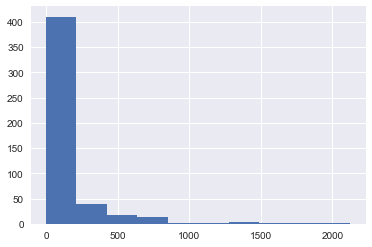

In [87]:
Amoutn_bad.hist()

**5. Построить графики histograms для всех значений**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002039AA97908>,
      dtype=object)

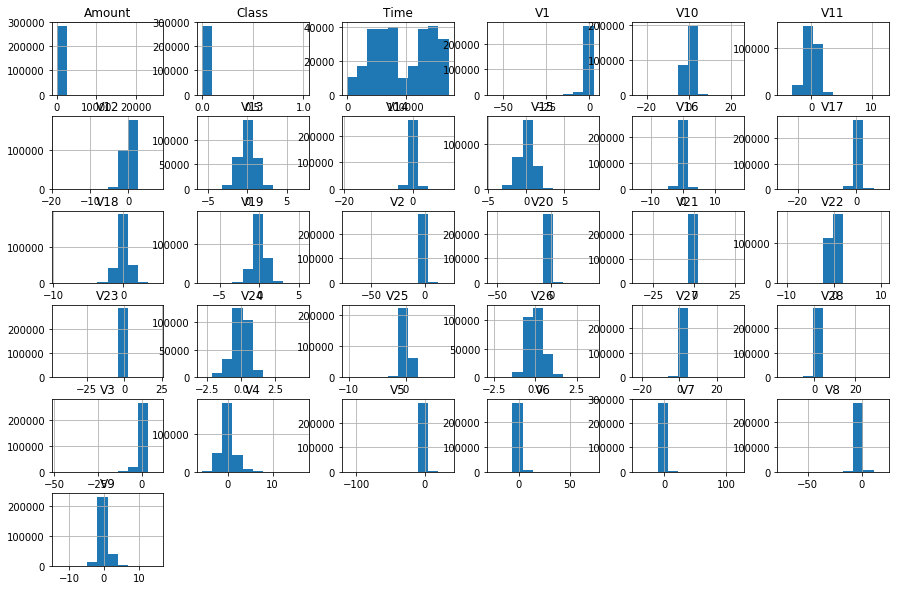

In [18]:
creditcard.hist(figsize = (15,10))

**6. Построить матрицу корреляций для всех значений**

In [19]:
corr = creditcard.corr()
corr = corr.round(2)
corr.style.background_gradient(cmap='coolwarm')
# Коэффициенты корреляции крайне малые. Видно что не работают многие из переменных

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1,0.12,-0.01,-0.42,-0.11,0.17,-0.06,0.08,-0.04,-0.01,0.03,-0.25,0.12,-0.07,-0.1,-0.18,0.01,-0.07,0.09,0.03,-0.05,0.04,0.14,0.05,-0.02,-0.23,-0.04,-0.01,-0.01,-0.01,-0.01
V1,0.12,1,0,-0,0,0,0,0,-0,0,0,0,0,-0,0,-0,0,-0,0,0,0,-0,0,0,0,-0,-0,0,0,-0.23,-0.1
V2,-0.01,0,1,0,-0,-0,0,0,-0,-0,-0,0,-0,0,-0,0,0,-0,0,0,-0,0,0,0,-0,-0,0,-0,-0,-0.53,0.09
V3,-0.42,-0,0,1,-0,-0,0,0,0,-0,0,-0,0,-0,0,0,0,0,0,0,-0,-0,0,0,-0,0,0,0,0,-0.21,-0.19
V4,-0.11,0,-0,-0,1,-0,-0,0,0,0,0,-0,-0,-0,-0,-0,-0,-0,0,-0,-0,-0,0,0,0,0,-0,-0,-0,0.1,0.13
V5,0.17,0,-0,-0,-0,1,0,-0,0,0,-0,0,0,-0,-0,-0,-0,0,0,-0,0,-0,0,0,-0,0,0,0,-0,-0.39,-0.09
V6,-0.06,0,0,0,-0,0,1,0,-0,0,0,0,0,-0,0,-0,-0,0,0,0,0,-0,-0,-0,-0,0,-0,-0,0,0.22,-0.04
V7,0.08,0,0,0,0,-0,0,1,-0,0,0,-0,0,-0,-0,0,0,0,-0,-0,0,0,-0,0,-0,0,-0,-0,-0,0.4,-0.19
V8,-0.04,-0,-0,0,0,0,-0,-0,1,0,0,0,-0,-0,-0,0,0,-0,-0,-0,-0,-0,0,0,-0,-0,-0,0,-0,-0.1,0.02
V9,-0.01,0,-0,-0,0,0,0,0,0,1,-0,0,-0,-0,0,-0,-0,0,0,0,-0,0,0,0,-0,0,-0,-0,0,-0.04,-0.1


**7. Взять все имеющиеся атрибуты из таблицы для предсказания. Разделить на тренировочные и тестовые. Написать логистическую регрессию. Сделать classification report. Нормализовать значения. Написать логистическую регрессию. Сделать classification report, сравнить с предыдущим report. Есть ли улучшения?**

In [20]:
X_names = list(creditcard.columns)[:-1]
print(X_names)

['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']


In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X=creditcard[X_names]
y= creditcard['Class']

# разделим на тренировочные данные и на тестовые
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

In [22]:
# Обучим логистическую регрессию
model = LogisticRegression(solver='liblinear').fit(X_train, y_train)

from sklearn.metrics import classification_report
model_pred = model.predict(X_test)

print(classification_report(y_test, model_pred))
# Данные о мошеннических операциях не очень точные (f1-score 0.75). Нормализация данных должна улучшить картину 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71070
           1       0.90      0.64      0.75       132

    accuracy                           1.00     71202
   macro avg       0.95      0.82      0.88     71202
weighted avg       1.00      1.00      1.00     71202



In [23]:
# Нормализуем данные X, y 
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

creditcard_norm = pd.DataFrame(min_max_scaler.fit_transform(creditcard), index=creditcard.index, columns=creditcard.columns)
# creditcard_norm = StandardScaler(with_std=False,copy=False).fit_transform(creditcard)

X_norm=creditcard_norm[X_names]
y_norm= creditcard_norm['Class']

# разделим на тренировочные данные и на тестовые
X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(X_norm, y_norm, test_size=0.25, random_state=27)


In [24]:
# Обучим логистическую регрессию
model_norm = LogisticRegression(solver='liblinear').fit(X_train_norm, y_train_norm)

from sklearn.metrics import classification_report
model_pred_norm = model_norm.predict(X_test_norm)

print(classification_report(y_test_norm, model_pred_norm))
# После нормализации, f1-score незначительно ухудшилось

              precision    recall  f1-score   support

        -1.0       1.00      1.00      1.00     71070
         1.0       0.94      0.60      0.73       132

    accuracy                           1.00     71202
   macro avg       0.97      0.80      0.87     71202
weighted avg       1.00      1.00      1.00     71202



**8. Написать модель RandomForestClassifier на данный датасет и сравнить результаты с логистической регрессией. Почему результаты получились лучше (или хуже). Тренировочные и тестовые данные выбираем одинаковые (те же, что и для логистической регрессии), полученные на шаге 7.**

In [25]:
from sklearn.ensemble import RandomForestClassifier

# создаем модель деревья решений
# выбираем 100 деревьев в качестве параметра
model3=RandomForestClassifier(n_estimators=100)

In [26]:
# обучаем модель - модель считает долго
model3.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

No handles with labels found to put in legend.


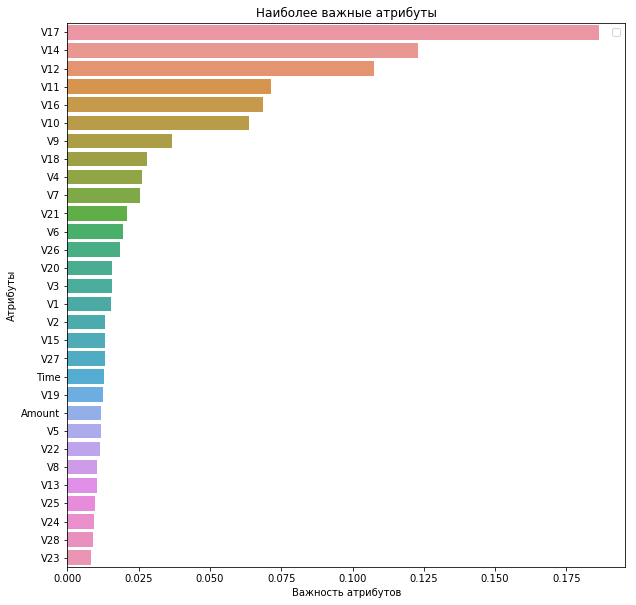

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71070
           1       0.98      0.81      0.89       132

    accuracy                           1.00     71202
   macro avg       0.99      0.91      0.94     71202
weighted avg       1.00      1.00      1.00     71202



0.9996207971686188

In [18]:
headers = list(X_train.columns.values)

feature_imp = pd.Series(model3.feature_importances_,index=headers).sort_values(ascending=False)

f, ax = plt.subplots(figsize=(10, 10))
sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Важность атрибутов')
plt.ylabel('Атрибуты')
plt.title("Наиболее важные атрибуты")
plt.legend()
plt.show()

# Считаем качество модели
model_pred3 = model3.predict(X_test)
print(classification_report(y_test, model_pred3))
model3.score(X_test, y_test)
# На лицо улучшение f1-score, по сравнению с Логистической регрессией (не нормализованные данные)

**9. Уравновесить классы с помощью up-sampling (тестовые данные не меняем, только тренировочные). Написать логистическую регрессию на сгенерированные данные и сравнить результат с моделями, полученными на шаге 7 и 8. В качестве тестовых данных используем один и тот же датасет, полученный на шаге 7.**

In [27]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

ros = RandomOverSampler(random_state=0)

ros.fit(X_train, y_train)
X_resampled, y_resampled = ros.fit_sample(X_train, y_train)
print('Количество элементов до операции:', len(X_train))
print('Количество элементов после операции:', len(X_resampled))

Количество элементов до операции: 213605
Количество элементов после операции: 426490


In [28]:
# Мы увеличили количество элементов, и уравняли классы по количеству
unique, counts = np.unique(y_resampled, return_counts=True)
dict(zip(unique, counts))

{0: 213245, 1: 213245}

In [29]:
# Обучим логистическую регрессию
model_log_res = LogisticRegression(solver='liblinear').fit(X_resampled, y_resampled)

from sklearn.metrics import classification_report
model_pred_log_res = model_log_res.predict(X_test)

print(classification_report(y_test, model_pred_log_res))
# Качество угадывания ухудшилось как при SAmplinge вверх, так и при SApmplinge вниз.
# При этом параметр accuracy довольно высокий, на сколько понимаю, это из-за малой доли мошеннических действий

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     71070
           1       0.08      0.86      0.14       132

    accuracy                           0.98     71202
   macro avg       0.54      0.92      0.57     71202
weighted avg       1.00      0.98      0.99     71202



In [30]:
# Попробуем снизить количество наблюдений. Вдруг из-за resampling размылась информация
ros1 = RandomUnderSampler(random_state=0)
ros1.fit(X_train, y_train)
X_resampled1, y_resampled1 = ros1.fit_sample(X_train, y_train)
print('Количество элементов до операции:', len(X_train))
print('Количество элементов после операции:', len(X_resampled1))


Количество элементов до операции: 213605
Количество элементов после операции: 720


In [31]:
# Обучим логистическую регрессию
model_log_res1 = LogisticRegression(solver='liblinear').fit(X_resampled1, y_resampled1)

from sklearn.metrics import classification_report
model_pred_log_res1 = model_log_res.predict(X_test)

print(classification_report(y_test, model_pred_log_res1))
# Качество угадывания ухудшилось и при SApmplinge вниз.

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     71070
           1       0.08      0.86      0.14       132

    accuracy                           0.98     71202
   macro avg       0.54      0.92      0.57     71202
weighted avg       1.00      0.98      0.99     71202



# Задание для интересующихся time-series (временными рядами)

In [ ]:
# Не делал. Переключился на Дипломное задание

Есть датасет потребления электроэнергии.

In [ ]:
import pandas as pd
url="http://yustiks.ru/dataset/household_power_consumption.txt"

In [4]:
df = pd.read_csv(url, sep=';', 
                 parse_dates={'dt' : ['Date', 'Time']}, infer_datetime_format=True, 
                 low_memory=False, na_values=['nan','?'], index_col='dt')

In [5]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [ ]:
# Хороший пример для LSTM модели можно найти здес